---
# Exercício Breast Cancer - kNN, Regressão Logística
---
**Machine Learning em Projetos (Erick Muzart e Fernando melo)**   

Tópicos:
- One-hot Encoder get-dummies
- Knn
- Regressão logística
- Matriz de confusão

<br>
------------------------------------------------


#### **Descrição do projeto de machine learning**
Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação  simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.  
  
**1- Descrição do problema ou tarefa:**  
Prever se o câncer de mama é maligno ou benigno com base nas características da imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária.   
**2- Descrição da solução de IA:**  
Treinamento supervisionado de modelo de classificação de câncer de mama em 2 classes (benigno/maligno) com base nas características dos núcleos celulares presentes na imagem.   
**3- Fonte de dados:**  
Os dados foram obtidos a partir de uma imagem digitalizada de um aspirado por agulha fina (FNA) de uma massa mamária. Eles descrevem as características dos núcleos celulares presentes na imagem.   
Fonte dados: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html   
**4- Variáveis independentes (preditoras ou "features"):**  
'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'     
**5- Variável dependente (resposta ou "target"):**  
Tipo de câncer benigno ou maligno

## Carregar bibliotecas

In [2]:
# Importar bibliotecas pandas, plot_confusion_matrix, train_test_split, matplotlib, metrics, seaborn, metrics
import pandas as pd

## Análise exploratória dos dados

In [3]:
# Importar  e instanciar dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# Converter sklearn dataset em pandas dataframe
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
# Cria nova coluna target
df['y']= list(pd.Series(cancer.target).astype(int))
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
from autoML import AutoML
automl = AutoML(df)
automl.getResults()

,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,KNeighborsClassifier,"(mean symmetry, concave points error, worst te...",6,2.122735,216.347656,0.968145,0.956522,0.987500,"[[38, 4], [0, 72]]"
1,LogisticRegression,"(concave points error, worst texture, worst sm...",6,3.123598,215.613281,0.962422,0.947826,0.993333,"[[36, 6], [0, 72]]"
2,LogisticRegression,"(mean symmetry, concave points error, worst te...",7,3.385538,215.613281,0.962422,0.947826,0.993333,"[[36, 6], [0, 72]]"
3,LogisticRegression,"(mean symmetry, concave points error, worst te...",6,2.774686,215.125000,0.962422,0.947826,0.991667,"[[36, 6], [0, 72]]"
4,SVC(probability=True),"(mean symmetry, concave points error, worst te...",6,3.343403,216.035156,0.961249,0.947826,0.991667,"[[36, 6], [0, 72]]"
5,LogisticRegression,"(mean symmetry, concave points error, worst te...",6,2.954628,215.218750,0.956740,0.939130,0.990000,"[[36, 6], [0, 72]]"
6,LogisticRegression,"(mean symmetry, worst texture, worst smoothnes...",6,3.087091,215.500000,0.955985,0.939130,0.993333,"[[36, 6], [0, 72]]"
7,LogisticRegression,"(mean symmetry, concave points error, worst te...",6,2.916565,215.187500,0.949843,0.930040,0.989960,"[[36, 6], [0, 72]]"
8,SVC(probability=True),"(mean symmetry, concave points error, worst te...",6,3.342067,216.269531,0.944470,0.929249,0.987976,"[[36, 6], [0, 72]]"
9,LogisticRegression,"(mean symmetry, concave points error, worst sm...",6,2.912977,215.238281,0.942514,0.921344,0.983492,"[[36, 6], [1, 71]]"


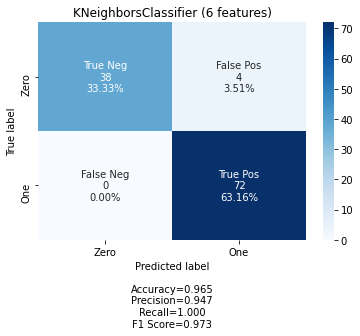

In [5]:
automl.getBestConfusionMatrix()

In [1]:
# Converter sklearn dataset em pandas dataframe

# Cria nova coluna target

# Mostra as dimensões do dataset e as primeiras linhas


In [2]:
# Verifica o total de valores nulos por variável no dataset


In [3]:
# Mostra gráfico do total de amostras por classe da variável dependente("target")
# Mostre o título e labels dos eixos X e Y no gráfico


In [4]:
# Lista o nome das variáveis independentes ("features")


In [5]:
# Mostra os nomes dos rótulos da variável dependente ("target")


#### Gráfico Pairplot ou Scatterplot Matrix
Cuidado: Quanto mais colunas no seu dataset, mais vai demorar para construir o gráfico e menos visível ele ficará.

In [6]:
# (Tempor estimado = 45 segundos)
# Mostra pairplot para visualizar correlações
# selecionar somente as primeiras 10 variáveis independentes do dataset

# Mostrar os nomes dos rótulos da variável target no topo do gráfico



## Pré-processamento

In [7]:
# Atribuir valores para X e y

# Mostrar as dimensões de X e y


### Precisa codificar as variáveis?


Encoding das variáveis independentes (features)   
Atenção : Todas as variáveis são numéricas, portanto não faremos codificão de variáveis.

### Precisa Normalizar os dados ?


Abaixo, Podemos verificar que os intervalos de valores das variáveis não estão na mesma escala, portanto a normalização aqui é recomendada.   
Como exemplo, veja a diferença de escala das variáveis abaixo:   
- smooth_error= entre 0,007 e 0,0311.    
- mean_area= entre 143,5 e 2501 .

In [8]:
# Mostra a descrição estatística das variáveis independentes (features)


Normalização dos dados : Nas próximas aulas iremos aprender a  utilizar o Standard Scaler do Sklearn.

In [ ]:
# Dividir dados em treino e teste (70/30) e semente aleatória = 42


## Treinamento dos modelos

### Knn - K vizinhos mais próximos (K Nearest neighbors)

In [ ]:
# Importar o modelo knn Classifier


In [ ]:
# Instanciar modelo de regressão logística


In [ ]:
# Treinar o modelo com os dados de treinamento


In [ ]:
# Verificar a acurácia do modelo (.score)


In [ ]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas


### Regressão Logística

In [ ]:
# Instanciar modelo de regressão logística


In [ ]:
# Treinar o modelo com os dados de treinamento


In [ ]:
# Verificar a acurácia do modelo (.score)


In [ ]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas


## Avaliação da qualidade do melhor modelo

In [ ]:
# Importar a biblioteca (plot_confusion_matrix)


In [ ]:
# Mostrar a Matriz de Confusão do melhor modelo treinado


## Próximos passos
- Fazer normalização dos dados (Standard Scalar)   
- Treinar outros modelos:   
  - Árvore de decisão (Decision Tree Classifier)   
  - Floresta aleatória (Random Forest Classifier)

In [9]:
# Árvore de decisão


In [10]:
# Random Forest
